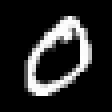

In [2]:
using Pkg
using Images
img = load("C://Users/Jash/OneDrive - University of Cincinnati/Desktop/Research/training/0/1.png")


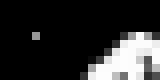

In [26]:
#size(img)
#typeof(img)
#img[5,5] = RGB(1,0.5,0)
img2 = img[1:10,1:20]

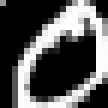

In [27]:
img3 = img[5:22,5:22]

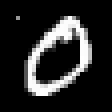

In [28]:
img4 = Gray.(img) #converts to grayscale

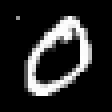

In [30]:
img5=RGB.(img) #convert to RGB

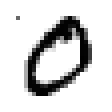

In [32]:
img6 = (x-> Gray(1)-x.val).(img) #applied function to image! (This is how i will make an input attack)

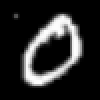

In [33]:
img6 = imresize(img,(50,50)) #change resolution

In [3]:
data = Float32.(channelview(img))

28×28 Matrix{Float32}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0       …  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0       …  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0          0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱                 ⋮         
 0.0  0.0  0.0  0.0  0.0  0.0  0.337255     0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.333333  …  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  

In [6]:
path = "C://Users/Jash/OneDrive - University of Cincinnati/Desktop/Research/training/"
X = []
y = []
for label in readdir(path)
    for file in readdir("$path/$label")
        img = load("$path/$label/$file")
        data = reshape(Float32.(channelview(img)),28,28,1)
        if length(X) == 0
            X = data
        else
            X = cat(X, data, dims=3)
        end
        #push!(X, Float32.(channelview(load(path*label*"/"*file))))
        push!(y, parse(Float32, label))
    end
end

In [4]:
using Images
function createDataset(path)
    X = []
    y = []
    for label in readdir(path)
        for file in readdir("$path/$label")
            img = load("$path/$label/$file")
            data = reshape(Float32.(channelview(img)),28,28,1)
            if length(X) == 0
                X = data
            else
                X = cat(X,data,dims=3)
            end
            push!(y,parse(Float32,label))
        end
    end
    return X,y
end



createDataset (generic function with 1 method)

In [6]:
x_test, y_test = createDataset("C://Users/Jash/OneDrive - University of Cincinnati/Desktop/Research/testing")

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Any[0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0  …  9.0f0, 9.0f0, 9.0f0, 9.0f0, 9.0f0, 9.0f0, 9.0f0, 9.0f0, 9.0f0, 9.0f0])

In [8]:
using Flux
model = Chain(
    Flux.flatten,
    Dense(784=>15,relu),
    Dense(15=>10,sigmoid),
    softmax
)

Chain(
  Flux.flatten,
  Dense(784 => 15, relu),               # 11_775 parameters
  Dense(15 => 10, σ),                   # 160 parameters
  NNlib.softmax,
)                   # Total: 4 arrays, 11_935 parameters, 46.871 KiB.

In [9]:

predict = model(Flux.unsqueeze(x_train[:,:,1],dims=3))

10×1 Matrix{Float32}:
 0.10200545
 0.09752182
 0.093935795
 0.09848465
 0.1025097
 0.10099105
 0.10772559
 0.092483655
 0.10102729
 0.10331503

In [10]:
y_train[1]

0.0f0

In [5]:
x_train, y_train = createDataset("C://Users/Jash/OneDrive - University of Cincinnati/Desktop/Research/training")

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Any[0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0, 0.0f0  …  9.0f0, 9.0f0, 9.0f0, 9.0f0, 9.0f0, 9.0f0, 9.0f0, 9.0f0, 9.0f0, 9.0f0])

In [11]:
# Assemble the training data
data = Flux.DataLoader((x_train,y_train), shuffle=true)

# Initialize the ADAM optimizer with default settings
optimizer = Flux.setup(Adam(), model)

# Define the loss function that uses the cross-entropy to 
# measure the error by comparing model predictions of data 
# row "x" with true data label in the "y"
function loss(model, x, y)
	return Flux.crossentropy(model(x),Flux.onehotbatch(y,0:9))
end

# Train the model 10 times in a loop
for epoch in 1:10
	Flux.train!(loss, model, data, optimizer)
end

In [12]:
predict = model(Flux.unsqueeze(x_train[:,:,1],dims=3)) # correct prediction !

10×1 Matrix{Float32}:
 0.23196934
 0.08533675
 0.08533675
 0.08533675
 0.08533675
 0.08533675
 0.08533675
 0.08533675
 0.08533675
 0.08533675

In [13]:
function accuracy()
    correct = 0
    for index in 1:length(y_test)
        probs = model(Flux.unsqueeze(x_test[:,:,index],dims=3))
        predicted_digit = argmax(probs)[1]-1
        if predicted_digit == y_test[index]
            correct +=1
        end
    end
    return correct/length(y_test)
end

accuracy (generic function with 1 method)

In [14]:
for epoch in 1:10
    Flux.train!(loss, model, data, optimizer)
    println(accuracy())
end

0.9244


0.9187


0.9264


0.9247


0.92


0.916


0.9193


0.9233


0.9131


0.9094


In [16]:
# Create a LeNet model
model = Chain(
    Conv((5,5),1 => 6, relu),
    MaxPool((2,2)),
    Conv((5,5),6 => 16, relu),
    MaxPool((2,2)),
    Flux.flatten,
    Dense(256=>120,relu),
    Dense(120=>84, relu),
    Dense(84=>10, sigmoid),
    softmax
)

# Function to measure the model accuracy
function accuracy()
    correct = 0
    for index in 1:length(y_test)
        probs = model(Flux.unsqueeze(x_test[:,:,:,index],dims=4))
        predicted_digit = argmax(probs)[1]-1
        if predicted_digit == y_test[index]
            correct +=1
        end
    end
    return correct/length(y_test)
end

# Reshape the data
x_train = reshape(x_train, 28, 28, 1, :)
x_test = reshape(x_test, 28, 28, 1, :)

# Assemble the training data
train_data = Flux.DataLoader((x_train,y_train), shuffle=true)

# Initialize the ADAM optimizer with default settings
optimizer = Flux.setup(Adam(), model)

# Define the loss function that uses the cross-entropy to 
# measure the error by comparing model predictions of 
# data row "x" with true data from label "y"
function loss(model, x, y)
	return Flux.crossentropy(model(x),Flux.onehotbatch(y,0:9))
end

# Train model 100 times in a loop
for epoch in 1:100
    Flux.train!(loss, model, train_data, optimizer)
    println(accuracy())
end

0.9244


0.9309


0.9432


0.8933


0.9052


0.9391


0.9373


0.936


0.9468


0.9385


0.9146


0.9269


0.9526


0.9099


0.9425


0.9354


0.9452


0.9236


0.9141


0.9148


0.9351


0.9313


0.9391


0.9431


0.9407


0.9453


0.8807


0.9369


0.9408


0.9507


0.9314


0.9506


0.9215


0.9304


0.9502


0.9538


0.936


0.9414


0.9408


0.9384


0.9309


0.9408


0.9312


0.9304


0.9397


0.9339


0.9335


0.9306


0.9416


0.9576


0.9474


0.9396


0.9525


0.9356


0.9429


0.9389


0.9269


0.9491


0.9396


0.9468


0.9386


0.951


0.9464


0.9439


0.9359


0.9423


0.9345


0.959


0.951


0.9482


0.9627


0.9469


0.942


0.8724


0.9354


0.9489


0.9502


0.9425


0.9531


0.9325


0.9526


0.9152


0.9319


0.9584


0.9401


0.9488


0.9526


0.9539


0.9284


0.9535


0.953


0.9442


0.9499


0.9415


0.9528


0.903


0.9059


0.9386


0.9296


0.9461
